In [52]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [81]:
print(os.getcwd())
with open('../../../result.json') as f:
    lines = f.readlines()
    data = list(map(lambda s:json.loads(s), lines))
    dfAll = pd.DataFrame(data)
    
dfAll['msgPerSec'] = dfAll['msgPerSec'].apply(lambda x: x /1_000)
dfAll['nMsgPerWin'] = dfAll['nMsgPerWin'].apply(lambda x: '$\\infty$' if x==1000000 else str(x))
hue = 'Messages per Window'
style = 'Windows per Await'
dfAll = dfAll.rename(columns={'nMsgPerWin': hue, 'nWinPerAwait': style})
dfAll


/Users/terenceng/Documents/KTH/2024 Digital Future/Windowed-CRDT/src/main/python


,nMsg,Messages per Window,nActor,Windows per Await,msgPerSec,time
0,7501,$\infty$,1,1,0.749950,10.002
1,7518,200,1,1,0.751424,10.005
2,7562,400,1,1,0.756049,10.002
3,15619,$\infty$,2,1,1.561588,10.002
4,11202,200,2,1,1.119864,10.003
5,12790,400,2,1,1.278361,10.005
6,30289,$\infty$,4,1,3.027992,10.003
7,21980,200,4,1,2.197341,10.003
8,25604,400,4,1,2.559888,10.002
9,61192,$\infty$,8,1,6.116753,10.004


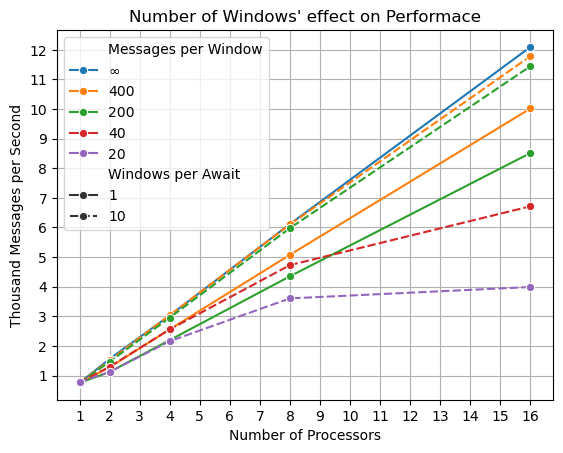

In [87]:
fig, ax = plt.subplots()
# sns.set(font_scale=1.1)
# df = dfAll.loc[dfAll['nWinPerAwait']==1]#.loc[dfAll['Windows'].isin([0,20,200])]
p = sns.lineplot(
    x='nActor', 
    y='msgPerSec', 
    data=dfAll, 
    ax = ax,
    hue= hue,
    hue_order= ['$\\infty$', '400', '200', '40', '20'],
    style= style,
    marker='o'
    )

ax.set_xlabel('Number of Processors')
ax.set_xticks(np.arange(1, 17))
ax.set_ylabel('Thousand Messages per Second')
ax.set_yticks(np.arange(1,13))

ax.grid()
ax.title.set_text('Number of Windows\' effect on Performace')
plt.show()
fig.savefig('../../../target/ScalePlot.png', dpi=300)

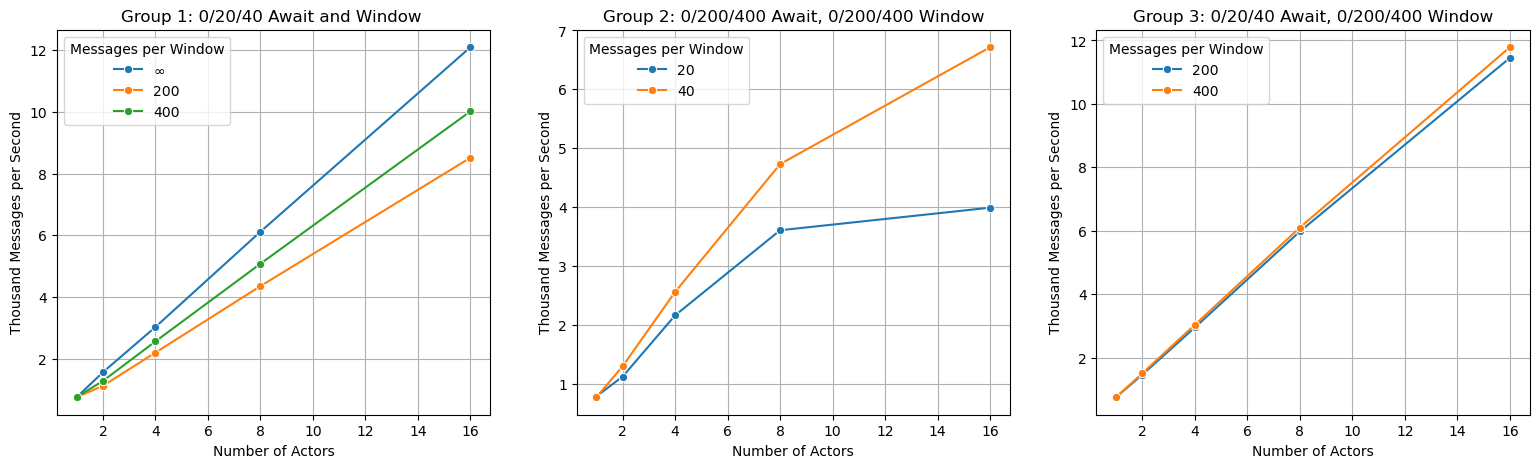

In [64]:
# fig, axs = plt.subplots(1, 3, figsize = (19,5))

# # plot 1
# ax = axs[0]

# df = dfAll.loc[dfAll['nWinPerAwait']==1]
# df = df[['nActor', 'msgPerSec','Messages per Window']]
# p = sns.lineplot(
#     x='nActor', 
#     y='msgPerSec', 
#     data=df, 
#     ax = ax,
#     hue='Messages per Window',
#     marker='o'
#     )

# ax.set_xlabel('Number of Actors')
# ax.set_ylabel('Thousand Messages per Second')

# ax.grid()
# ax.title.set_text('Group 1: 0/20/40 Await and Window ')

# # plot 2
# ax = axs[1]

# df = dfAll.loc[dfAll['nWinPerAwait']==10].loc[dfAll['Messages per Window'].isin(['20','40'])]
# df = df[['nActor', 'msgPerSec','Messages per Window']]
# p = sns.lineplot(
#     x='nActor', 
#     y='msgPerSec', 
#     data=df, 
#     ax = ax,
#     hue='Messages per Window',
#     marker='o'
#     )

# ax.set_xlabel('Number of Actors')
# ax.set_ylabel('Thousand Messages per Second')

# ax.grid()
# ax.title.set_text('Group 2: 0/200/400 Await, 0/200/400 Window')

# # plot 3
# ax = axs[2]

# df = dfAll.loc[dfAll['nWinPerAwait']==10].loc[dfAll['Messages per Window'].isin(['200','400'])]
# df = pd.concat([df, dfAll.loc[dfAll['Messages per Window']==0]])
# df = df[['nActor', 'msgPerSec','Messages per Window']]
# p = sns.lineplot(
#     x='nActor', 
#     y='msgPerSec', 
#     data=df, 
#     ax = ax,
#     hue='Messages per Window',
#     marker='o'
#     )

# ax.set_xlabel('Number of Actors')
# ax.set_ylabel('Thousand Messages per Second')

# ax.grid()
# ax.title.set_text('Group 3: 0/20/40 Await, 0/200/400 Window')

# plt.show()
# fig.savefig('../../../target/ScalePlot.png', dpi=300)